# Data Augmentation 練習

參考網站：
[Pytorch提供之torchvision data augmentation技巧](https://chih-sheng-huang821.medium.com/03-pytorch-dataaug-a712a7a7f55e)  

Function包含
* Numpy image 和 PIL image轉換
* 影像 Normalize
* 影像 Resize
* 影像 CenterCrop
* 影像 Pad
* 影像 RandomCrop
* 影像 RandomHorizontalFlip 和 RandomVerticalFlip
* 影像 RandomResizedCrop
* 影像 TenCrop
* 影像 GaussianBlur
* 影像 RandomAffine
* 影像 Grayscale 和 RandomGrayscale
* 影像 RandomPerspective
* 影像 ColorJitter
* 影像 RandomRotation



注意: torchvision基本上是PIL模組裡面提供的函數進行影像轉換
只是torchvision將PIL的function包裝成在torchvision的class(functional)方式進行宣告
然後套用transforms.Compose將所有的處理包裝成一個fun，以方便後續的程式操作

In [2]:
import PIL.Image as Image
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import warnings
print('torchvision',torchvision.__version__)
print('torch',torch.__version__)


torchvision 0.5.0
torch 1.4.0


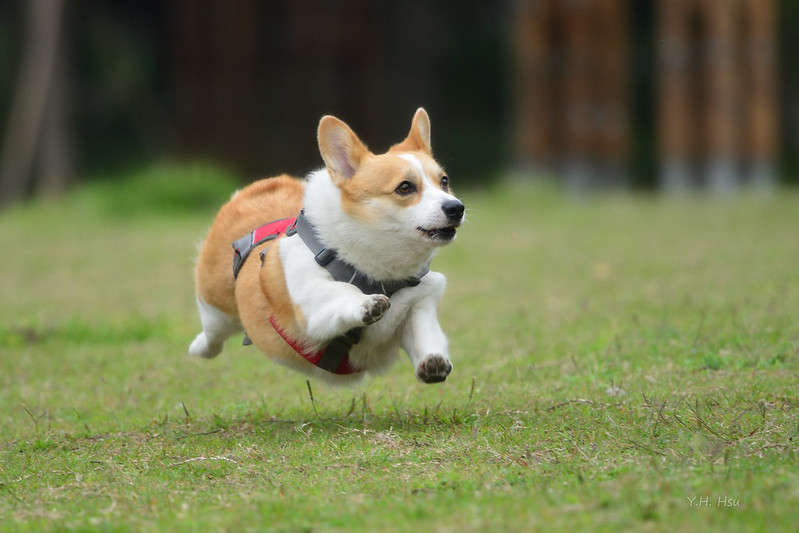

In [3]:

warnings.filterwarnings("ignore")
imagepath='./imgs/dog.png'

# read image with PIL module
img_pil = Image.open(imagepath, mode='r')
img_pil = img_pil.convert('RGB')
img_pil

## torchvision模組import

In [4]:
from torchvision import transforms
from torchvision.transforms import functional as TF

# Numpy image 和 PIL image轉換

- PIL image 轉換成 Numpy array
- Numpy array 轉換成 PIL image

In [33]:
trans_toPIL = transforms.ToPILImage() # 將  "pytoch tensor" 或是  "numpy.ndarray" 轉換成 PIL Image.

img_np = np.asarray(img_pil) # 將PIL image轉換成  "numpy.ndarray" 
print('image type before convert:{}'.format(type(img_np)))

img_pil = trans_toPIL(img_np)
print('image type after convert:{}'.format(type(img_pil))) 

#image type before convert:<class 'numpy.ndarray'>

#image type after convert:<class 'PIL.Image.Image'>

image type before convert:<class 'numpy.ndarray'>
image type after convert:<class 'PIL.Image.Image'>


## 影像 Normalize

將影像(torch tensor)的每個channel(R,G,B)依據平均數和標準差分別進行影像的正規化(Z-score)

參數設定:

* mean: 每個channel的平均數。
* std: 每個channel的平標準差

output[channel] = (input[channel] — mean[channel]) / std[channel]

稍微注意一下，這邊的正規化是在torch tensor上操作，torch tensor基本上在函數內  
已經將影像8 bits值域(0–255)除上255，所以輸出為0–1之間。 所以平均數和標準差的設定通常都是0.xx

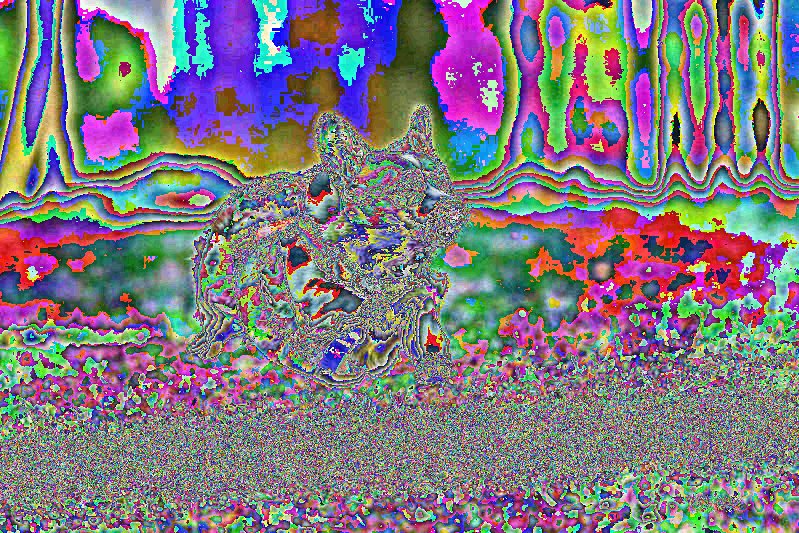

In [34]:
mean = [0.5, 0.5, 0.5]
std = [0.1, 0.1, 0.1]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std), 
    transforms.ToPILImage() 
])

img_pil_normal = transform(img_pil)
img_pil_normal

## 影像 Resize
參數設定:

- size: 可以設定一個固定長寬值，也可以長寬分別設定 ex: size=200 或是 size = (height, width) = (50,40)
- interpolation: 圖在縮放採用的插值方法，default為PIL.Image.BILINEAR 還有其他方法PIL.Image.NEAREST, PIL.Image.BILINEAR and PIL.Image.BICUBIC.可以選擇

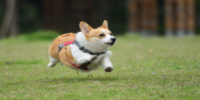

In [47]:
size = (100, 200)
transform =  transforms.Resize(size)
new_img = transform(img_pil)
new_img

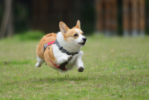

In [46]:
size = 100
transform =  transforms.Resize(size)
new_img = transform(img_pil)
new_img

## 影像 CenterCrop

以圖片(PIL Image)中心點往外延伸設定的大小(size)範圍進行圖像切割。

參數設定:

* size: 可以設定一個固定長寬值，也可以長寬分別設定 如果設定大小超過原始影像大小，則會以黑色(數值0)填滿。 ex: size=200 則是以中心點出來，長寬個擷取200個pixels。 size = (height, width) = (200,300)，長擷取200個pixel，寬擷取300個pixels

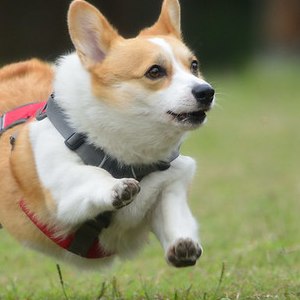

In [54]:
size = 300
transform = transforms.Compose([
    transforms.CenterCrop(size),
])
new_img = transform(img_pil)
new_img

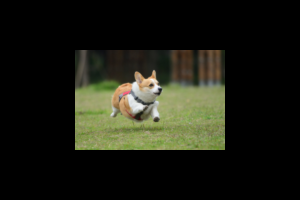

In [68]:
size = 200,300
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.CenterCrop(size),
])
new_img = transform(img_pil)
new_img

## 影像 Pad

以圖片(PIL Image)外部往外延伸填充寬度和高度，填充值為pad值。

參數設定:

* padding: 填充寬度和高度，可以為一個值(四個邊都用給予同樣的延伸)，或是分別對應四個邊設定。
* fill: 填充的值 設定一個值則是所有channel都填這個值 或是分別對三個channel分別設定， 須設定padding_mode=constant
* padding_mode: 填充模式   
    .constant: 填充固定數字  
    .edge:邊緣的值直接往外延伸  
    .eflect: 從邊緣往內一個pixel進行鏡射  
    .symmetric:從邊緣鏡射

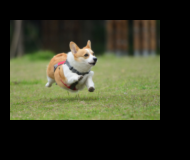

In [80]:
padding = (10, 20, 30, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, fill=0, padding_mode="constant"), 
])
new_img = transform(img_pil)
new_img

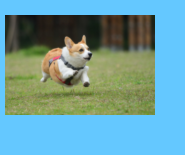

In [86]:
padding = (5, 15, 30, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, fill=(100,200,256), padding_mode="constant"), 
])
new_img = transform(img_pil)
new_img

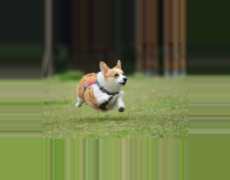

In [87]:
padding = (40, 40, 40, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, padding_mode="edge"), 
])
new_img = transform(img_pil)
new_img

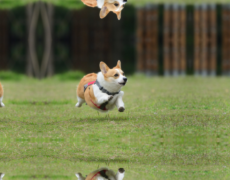

In [656]:
padding = (40, 40, 40, 40)
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Pad(padding, padding_mode="symmetric"), 
])
new_img = transform(img_pil)
new_img

## 影像 RandomCrop

以圖片(PIL Image)中隨機裁減一塊圖像出來。

參數設定:

* size: 填充寬度和高度，可以為一個值(寬度和高度都用給予同樣的延伸)，或是分別對應寬度和高度設定。
* padding: 參照影像Pad部分
* pad_if_needed: 是否需要填充，True or False
* fill: 參照影像Pad部分
* padding_mode: 參照影像Pad部分

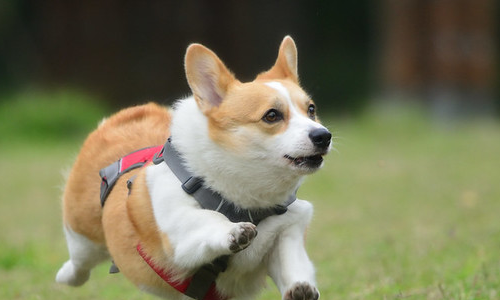

In [152]:
size=(300, 500)
transform = transforms.Compose([
    transforms.RandomCrop(size)
])
new_img = transform(img_pil)
new_img

## 影像 RandomHorizontalFlip 和 RandomVerticalFlip

圖片(PIL Image)會在給定的機率下隨機進行水平或是垂直翻轉。

參數設定:

* p: 圖片要進行翻轉的機率。

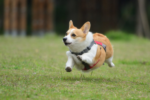

In [124]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomHorizontalFlip(p=0.9),
])

new_img = transform(img_pil)
new_img

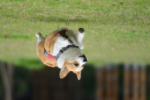

In [133]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomVerticalFlip(p=0.9),
])

new_img = transform(img_pil)
new_img

## 影像 RandomResizedCrop
參數設定:

* size: 圖片最後要輸出的大小。
* scale: 裁切圖片為原始突變的比例(default為0.08–1.0)
* ratio: 裁切圖片的原始長寬比(default:3/4–4/3)。
* interpolation: check 影像 Resize。

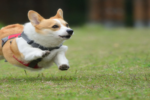

In [157]:
transform = transforms.Compose([
    transforms.RandomResizedCrop((100, 150))
])

new_img = transform(img_pil)
new_img

## 影像 TenCrop

圖片(PIL Image)裁減一張圖得四個角圖片以及中間的圖片到指定大小(size)，並且進行水平或是垂直翻轉等。

參數設定:

* size: 圖片最後要輸出的大小。
* vertical_flip: 是否垂直翻轉，預設為水平翻轉(default:False)

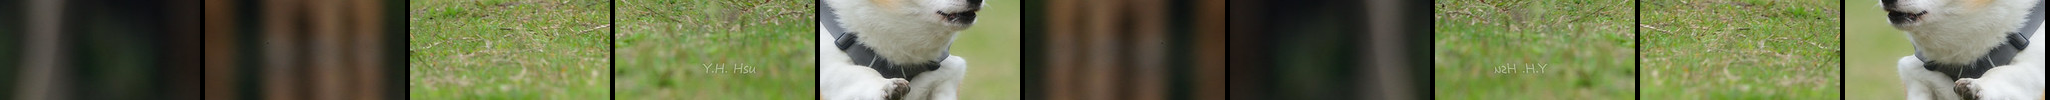

In [178]:
UNIT_SIZE=200
size = (100, UNIT_SIZE)

transform = transforms.Compose([
    transforms.TenCrop(size, vertical_flip=False)
])

new_img = transform(img_pil)

delta = 50
new_img_2 = Image.new("RGB", (UNIT_SIZE*10+delta, 100))
top_right = 0
for im in new_img:
    new_img_2.paste(im, (top_right, 0)) 
    top_right += UNIT_SIZE + int(delta/10) 

new_img_2

In [170]:
UNIT_SIZE=150
size = (100, UNIT_SIZE)

transform = transforms.Compose([
    transforms.TenCrop(size, vertical_flip=False)
])

new_img = transform(img_pil)
new_img

(<PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D6BA2BE0>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D6BA2198>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D6A8E208>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D6BA2B00>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D6BA2908>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D64296A0>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D65F5908>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D65F5470>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D66FCF28>,
 <PIL.Image.Image image mode=RGB size=150x100 at 0x7FC1D66FCC88>)

## 影像 GaussianBlur

圖片(PIL Image or torch tensor)高斯模糊化 如果為torch tensor影像必須為[…, C, H, W]。
… means an arbitrary number of leading dimensions

參數設定:

* kernel_size: 高斯kernel的大小。  
* sigma: 高斯kernel生成的標準差，sigma值需為   
   1. float: (float)，sigma固定在設定的float值  
   2. tuple: (min, max)，sigma在(min, max)隨機取出一個值。

這段的code不能執行，因為我是用Windows系統，目前2021/2/24 torchvision能支援windows的版本為0.5.0，高斯模糊為torchvision 0.7.0以上才支援  
refernce: [gaussianblur-transform-not-found-in-torchvision](https://stackoverflow.com/questions/65304189/gaussianblur-transform-not-found-in-torchvision-transforms)

In [185]:
torchvision.__version__

'0.5.0'

In [183]:
transform = transforms.Compose([
    transforms.GaussianBlur(7,3)
])
new_img = transform(img_pil)
new_img

AttributeError: module 'torchvision.transforms' has no attribute 'GaussianBlur'

## 影像 RandomAffine
圖片(PIL Image or torch tensor)保持中心不變的圖像的隨機仿射變換。

參數設定:

* degrees: 旋轉角度， 設定為0代表不做圖片旋轉。  
   1. float or int: 角度在(-degrees,+degrees)隨機取一個。  
   2. tuple: (min, max)，角度在(min, max)隨機取出一個值。
* translate: 水平和垂直平移，defalut為不做平移。  
   ex: translate=(a, b)，水平部分會隨機在(-img_widtha, img_widtha) 平移  
       垂直部分會隨機在(-img_heightb, img_heightb) 平移
* scale: 縮放參數，為一個區段設定，defalut為keep原始圖片大小。  
         (a,b)縮放參數會在a-b之間隨機抽出一個數字。
* shear: 圖像裁減參數，可以參考Crop的設定，defalut為不做裁減。
* resample:An optional resampling filter 參考 https://pillow.readthedocs.io/en/latest/handbook/concepts.html#filters
* fillcolor:圖像外部填充的顏色。 (Tuple for RGB Image and int for grayscale) 。

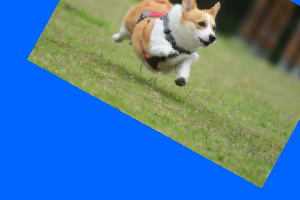

In [81]:
transform = transforms.Compose([
    transforms.Resize((200,300)),
    transforms.RandomAffine(degrees=(-30,30), translate=(0.3, 0.3), scale=(0.4, 1.2), shear=(0,0), fillcolor=(0,100,255))
])

new_img = transform(img_pil)
new_img

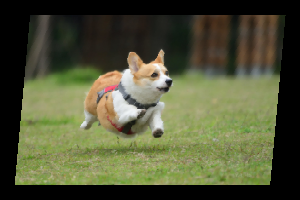

In [38]:
transform = transforms.Compose([
    transforms.Resize((200,300)),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
])

new_img = transform(img_pil)
new_img

  

## 影像 Grayscale 和 RandomGrayscale

Grayscale將圖片(PIL Image or torch tensor)轉換成灰階。

Grayscale 參數設定:  
— num_output_channels (int，(1 or 3)): 輸出圖像要幾個channel *  
   1: image is single channel *  
   3: image is 3 channel with r == g == b

RandomGrayscale 參數設定:
— p: 圖片要進行轉換灰階的機率。

note: RandomGrayscale和 Grayscale不同，如果輸入是channel數是1，輸出的灰階則是1個chnnel，如果輸入是三個channel，則輸出3 channel with r == g == b。


Grayscale version of the input.

* If ```python num_output_channels == 1``` : returned image is single channel

* If ```python num_output_channels == 3``` : returned image is 3 channel with r == g == b



original shape: (533, 799, 3)
shape: (100, 150)


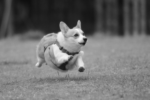

In [294]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Grayscale(num_output_channels= 1)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
，注意資料維度new_img

original shape: (533, 799, 3)
shape: (100, 150, 3)


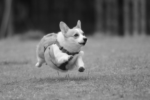

In [6]:
# 輸出通道設定為３，注意資料維度
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.Grayscale(num_output_channels= 3)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
new_img


original shape: (533, 799, 3)
shape: (100, 150, 3)


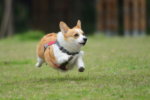

In [7]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomGrayscale(p=0.5)
])
new_img = transform(img_pil)
new_img_array = np.array(new_img)
print("original shape:", np.array(img_pil).shape)
print("shape:", new_img_array.shape)
new_img


## 影像 RandomPerspective

圖片(PIL Image or torch tensor)在給定的機率執行給定圖像的隨機透視變換。。

參數設定:
* distortion_scale (float): 控制失真(distortion)程度，範圍為0–1，default:0.5 
* p (float):執行轉換的機率，default: 0.5。   
* interpolation (int): Interpolation type。  
* fill (n-tuple or int or float): 當圖扭曲後，圖外滿要填滿的值(pyrorch 1.4.0 沒有此關鍵字引數)。

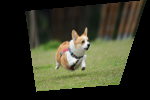

In [417]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomPerspective(distortion_scale=0.5, p=1, 
    interpolation=3)
])
new_img = transform(img_pil)
new_img

## 色彩抖動 ColorJitter

隨機調整圖片的亮度(brightness)、對比(contrast)、飽和度(saturation)和色調(hue)。

參數設定:

* brightness: (float or tuple(min, max)) 亮度 從\[max(0, 1-brightness), 1+brightness\]隨機取一個值，或是\[min, max\]，須為非負數。  

* contrast: (float or tuple(min, max)) 對比 從\[max(0, 1-contrast), 1+contrast\]隨機取一個值，或是\[min, max\]，須為非負數。  

* saturation: (float or tuple(min, max)) 飽和度 從\[max(0, 1-saturation), 1+saturation\]隨機取一個值，或是\[min, max\]，須為非負數。  

* hue: (float or tuple(min, max)) 色調 從\[-hue, hue\]隨機取一個值，或是\[min, max\],但hue必須設定在\[0,0.5\]或-0.5<=min<=max<=0.5。

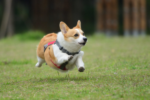

In [527]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
])

new_img = transform(img_pil)
new_img

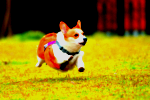

In [549]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.ColorJitter(brightness=(0, 3), contrast=(
        0, 3), saturation=(0, 3), hue=(-0.1, 0.1))
])

new_img = transform(img_pil)
new_img

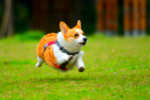

In [56]:
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2)
])

new_img = transform(img_pil)
new_img


## 影像 RandomRotation

將圖片隨機旋轉。

參數設定:

* degrees: (float or tuple(min, max)) 旋轉角度 從[-degrees, degrees]隨機取一個值，或是[min, max]。
* resample: 選轉後的圖，外圍補值方式。
* expand: (True or False) True: 將輸出圖況大到可以容納整張原始圖。 False: 輸出圖跟輸入圖一樣大，所以可能因為旋轉導致圖像被切斷。
* center: (n-tuple or int or float) 在圖片的哪個位置做為中心進行旋轉，default: None (圖的正中心旋轉)。
* fill: 同pad函數填滿方式，default: 0。

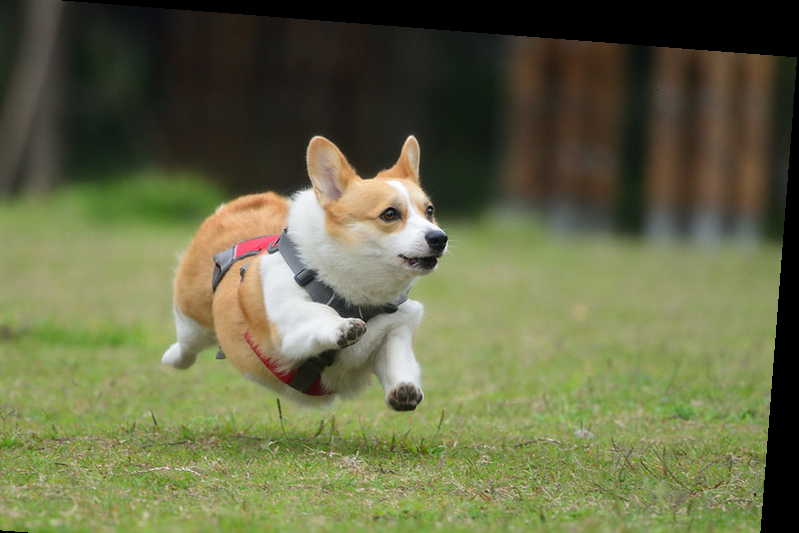

In [7]:
transform = transforms.Compose([
    transforms.RandomRotation(30, resample=Image.BICUBIC, expand=False, center=(55, 5))
])
new_img = transform(img_pil)
new_img

# 將轉換的function組合串起來使用

## 影像 RandomApply

從給定的機率下隨機執行全部的設定轉換組合。

參數設定:

* transforms (list or tuple or torch.nn.Module): list of transformations。
* p (float):probability，default: 0.5。

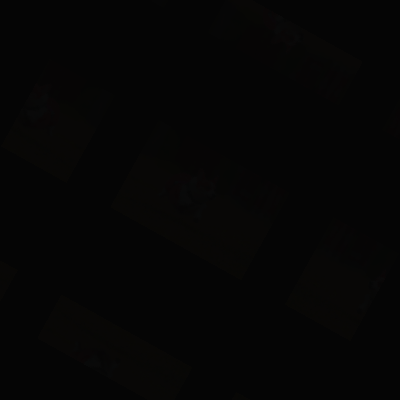

In [605]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(100, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter(brightness=(0, 3), contrast=(
        0, 3), saturation=(0, 3), hue=(-0.1, 0.1))
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomApply(transform_set, p=0.5)
])

new_img = transform(img_pil)
new_img

## 影像 RandomChoice 和 RandomOrder

RandomChoice: 從設定的轉換組合隨機選取一個轉換執行。  

RandomOrder: 從設定的轉換組合隨機打亂，全部執行。

參數設定:

* transforms (list or tuple or torch.nn.Module): list of transformations

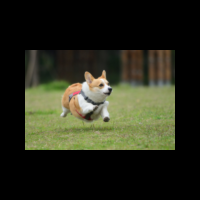

In [626]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(20, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter()
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomChoice(transform_set)
])

new_img = transform(img_pil)
new_img

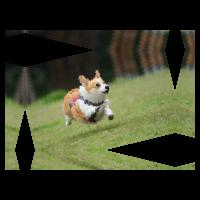

In [653]:
transform_set = [ 
             transforms.CenterCrop(200), 
             transforms.Pad(20, padding_mode='symmetric'),
             transforms.RandomRotation(30),
             transforms.ColorJitter()
]
transform = transforms.Compose([
    transforms.Resize((100,150)),
    transforms.RandomOrder(transform_set)
])

new_img = transform(img_pil)
new_img